# Analysis of Hotel Reservation Churning.

## Introduction
Hotels are a major part of the hospitality industry, that are considered to have a large economic impact to our community. Hotels provide accomodation, entertainment and leisure,both to local and international tourists. Due to their large target population(local and international), hotel reservation system has became a necessary component inorder to expand their customer base.

Hotel reservations systems are a convenient and easy way for customers to access hotel services.
Hotel customers also have the ability to cancel their hotel reservations in advance and receive a full refund or encounter some charges depending on the situation.This is a very convenient feature of hotel reservations to the customers.

## Business Understanding

Hotel business is a very profitable business in the current era.However any hotel can encounter great losses when there is an increase in the churn rate (cancellation of hotel reservations).This is because hotels require constant maintenance whose cost can only be accounted for when the hotel business is running.

The aim of this project is to develop a model that can predict whether a customer will cancel their hotel reservation or not based on certain features.With this model,hotels can be able to anticipate and counter any predestined hotel reservation cancellations.
In addition the model will provide insight on the features that influence the churn rate in the hotel business.This will enable hotel managers to mitigate the churn rate in the hotel business  

### Problem Statement

Being part of the hotel management, the company is been experiencing a dropping hotel revenue collection, which can be linked to the decreasing number of reservation bookings and increased reservation churning / cancelations. Therefore to mitigate this, we have been tasked with to come up with strategies and recommendations that are aimed at increased revenue collection in the hotel.
To accomplish this, we will undertake data analysis on the companies reservation data in order to find patterns that can improve revenue collection and hotel bookings as well as developing a model that can predict hotel churning inorder to effectively handle them before their occurence.

### Research Questions

 * Is the reservation churn rate the same in the various hotel categories?
 * Which are the busiest months in hotel bookings and which months receive the most cancellations?
 * Which reservation channel (e.g., online travel agencies, direct booking, etc.) leads to the most bookings, and which channel is associated  with the highest reservation cancellations?
 * Which countries contribute to the most bookings, and which countries are associated with the highest reservation cancellations?
 * Which hotel features/services need improvement?Can these improvements lead to a significant reduction in the churn rate?
 * What are the key factors that influence hotel reservation cancellations?
 * can we develop a predictive model to anticipate and mitigate reservation cancellations in the hotel business

### Main Objective
This project is aimed at providing appropriate recommendations / strategies that will increasing hotel revenue and to develop a model that can predict hotel churning / cancelation and its major causes and how to mitigate them.

### Specific Objectives

- Identify various patterns and trents that can improve revenue collection
- To devolope a model that can predict whether a reservation is canceled or not
- To identify the top 5 the major factors / features that are associated with reservation cancelations
- To develop a predictive model using machine learning algorithms that can anticipate reservation cancellations with a high level of accuracy (80% and above).
### Metrics of Success

- To provide insights on the factors that influence the churn rate in the hotel business. 
- The final model should have an accuracy score of 80% and above.

## Data Understanding
***
The datset contains information collected from two hotel categories; resort and city hotel with a structure of 31 variables and 119,390 observations, with a ratio of 34% to 66% respectively for the two hotels. Each row represents booking done within the period 1st July,2015 and 31st August,2017 and the bookings that were checked-in and the ones canceled.

For detail explanation of the dataset's columns, view the [Link](https://github.com/sha-ddie/Hotel-Reservation-Churning-Prediction/blob/main/data/columns.md)

The dataset was extracted from hotels’ Property Management System (PMS) SQL databases from different hotel categories ,resort and city,in Portugal. Dataset download [Link](https://bit.ly/2WvQbhJ)

The information contained in this dataset will be used to train out model.The columns (features) will provide great insight once used to train the model.

In [1]:
# Loading the required packages

import numpy as np
import pandas as pd

# plottings
import matplotlib.pyplot as plt
import seaborn as sns

# plotting styles
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
# loading the dataset
data = pd.read_csv('./data/hotel_bookings.csv')
print(f"Number of rows: {data.shape[0]} \n Number of columns: {data.shape[1]}")
data.head()

Number of rows: 119390 
 Number of columns: 32


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# checking structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
int_=len(data.select_dtypes(include='int64').columns)
cont_=len(data.select_dtypes(exclude=['int64','object']).columns)
text=len(data.select_dtypes(include='object').columns)
print('Continous columns: ',cont_)
print('Categorical columns: ',int_)
print('String columns: ',text)


Continous columns:  4
Categorical columns:  16
String columns:  12


> The hotel data has 32 columns with 4 of continous datatype, 16 of categories and 12 of string datatype

In [5]:
# summary statistics of columns
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


> From the data statistics above; majority of the columns are skewed negatively skewed or they have outliers. Also some columns have missing values


## Data Preparation
In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;
- Dropping Urrelevant Columns
- Checking and removing duplicates 
- Dealing with missing data 
- Checking if columns are of required data type 

### Dropping Irrelevant columns 

From the above output, and column descriptions the `company` and `agent`columns represent Identification Numbers  and therefore they are not useful in our data analysis therefore we drop them.
Also the `reservation_status_date` column is a date column and is not necessary to our analysis, we also drop it from our dataset.
We will therefore drop these column to help reduce the model complexity.

In [6]:
# dropping the irrelevant columns
data.drop(columns=['company','agent','reservation_status','reservation_status_date'], \
           axis=1, inplace=True)

### Dealing with Duplicates

In [8]:
# checking for duplicates
print(f"Duplicated: {data.duplicated().sum()}")

# removing duplicated rows
data.drop_duplicates(inplace=True)
data.shape

Duplicated: 32280


(87110, 28)

### Dealing with Missing Data

In [15]:
# checking for proportion of missing data
for col in data.columns:
    p=data[[col]].isna().sum()[0]
    if p!=0:
        print(f"{col}: {round((p/data.shape[0])*100,4)}")

children: 0.0046
country: 0.5177


> From our data we have 2 columns with missing values, with **County** column having 52% of its values missing. Since It represents the country of origin of the cutomers we will impute the missing values with **"Missing"** character inordet not to influence our analysis.

In [30]:
# filling the missing value in country column
data.country.fillna(value='Missing', inplace=True)

# filling the missing values in children column with median
data.children.fillna(value=data.children.median() , inplace=True)

In [16]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

## Exploratory Data Analysis

In order to develop a model from the dataset,it is necessary to explore the dataset exhaustively to gain a better understanding therefore we will perform explolatory analsis while exploring the various research questions. 

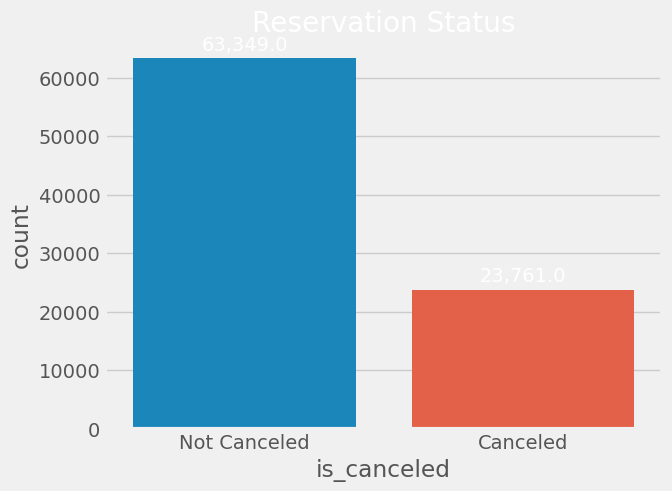

In [44]:
# ploting value counts of our dependent variable
plt.style.use("fivethirtyeight")
fig, ax=plt.subplots()
sns.countplot(x=data.is_canceled.replace({1:'Canceled',0:'Not Canceled'}), ax=ax)
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');
ax.set_title("Reservation Status");

From the graph above, 72% of the reservations were not canceled while 27% that were canceled. To our model this represents class imbalance and will be delt with in later sections 

Then we plot the most busy months for the hotel.

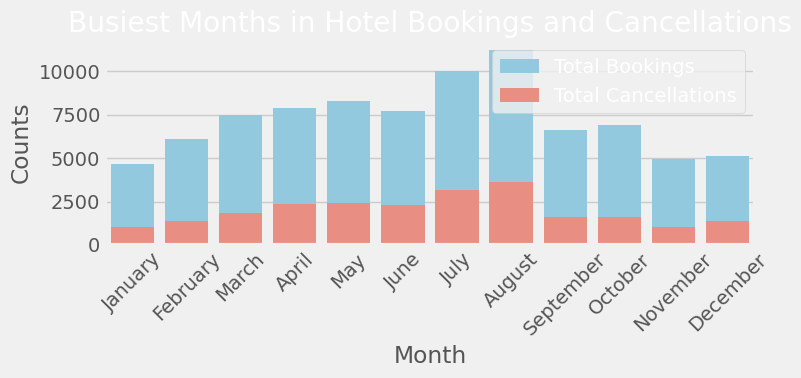

In [45]:
# Convert 'arrival_date_month' to a categorical data type with correct ordering
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

data['arrival_date_month'] = pd.Categorical(
    data['arrival_date_month'], categories=month_order, ordered=True
)

# Group data by month and calculate counts
monthly_counts = data.groupby('arrival_date_month').size().reset_index(name='total_bookings')

cancelled_counts = data[data['is_canceled'] == 1].groupby('arrival_date_month').size()\
    .reset_index(name='total_cancellations')

# Merge the two count DataFrames
result = pd.merge(monthly_counts, cancelled_counts, on='arrival_date_month')

#Plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='arrival_date_month', y='total_bookings', 
            data=result, color='skyblue', label='Total Bookings')
sns.barplot(x='arrival_date_month', y='total_cancellations',
            data=result, color='salmon', label='Total Cancellations')
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title('Busiest Months in Hotel Bookings and Cancellations')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

From the graph, we can observe trends in booking and cancellation activity across the months.

Although the summer months of July and August have the most reservations, they also continue to have high cancellation rates, which could mean that travellers are more flexible with their plans at this time of year. On the other hand, although there are fewer bookings made during months like January, February, November, and December, there are also fewer cancellations, maybe as a result of a more rigid plans. 

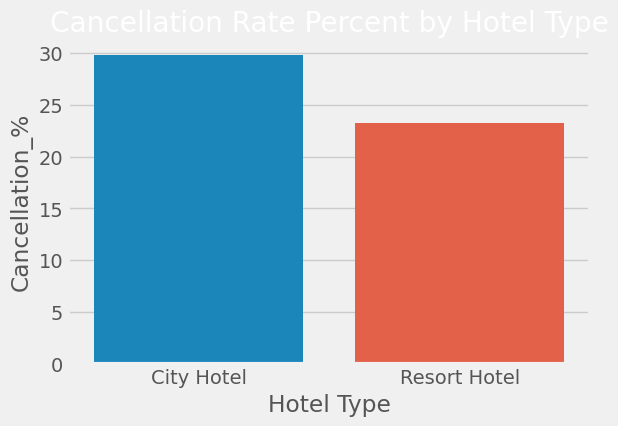

In [46]:
# Selecting and counting number of cancelled bookings for each hotel.

# filtering the DataFrame to include only rows where bookings are canceled
cancelled_data = data[data['is_canceled'] == 1]

# grouping the filtered data by the 'hotel' column.
cancel_grp = cancelled_data.groupby('hotel')

# calculates the size (count) of each group 
# creating a DataFrame d_1 with the number of cancelled bookings for each hotel
d_1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = data.groupby('hotel')
total_booking = grouped_by_hotel.size()
d_2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})

d_3 = pd.concat([d_1, d_2], axis = 1)

# Calculating cancel percentage 
d_3['cancel_%'] = round((d_3['total_cancelled_bookings']/d_3['total_bookings'])*100,2)

# plotting the graph
plt.figure(figsize=(6, 4))
sns.barplot(x=d_3.index, y=d_3['cancel_%'])
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation_%')
plt.title('Cancellation Rate Percent by Hotel Type');

> It is evident that the City Hotel had a significantly higher churn rate in comparison to the Resort Hotel. Nearly 30% of the bookings at the City Hotel were canceled.

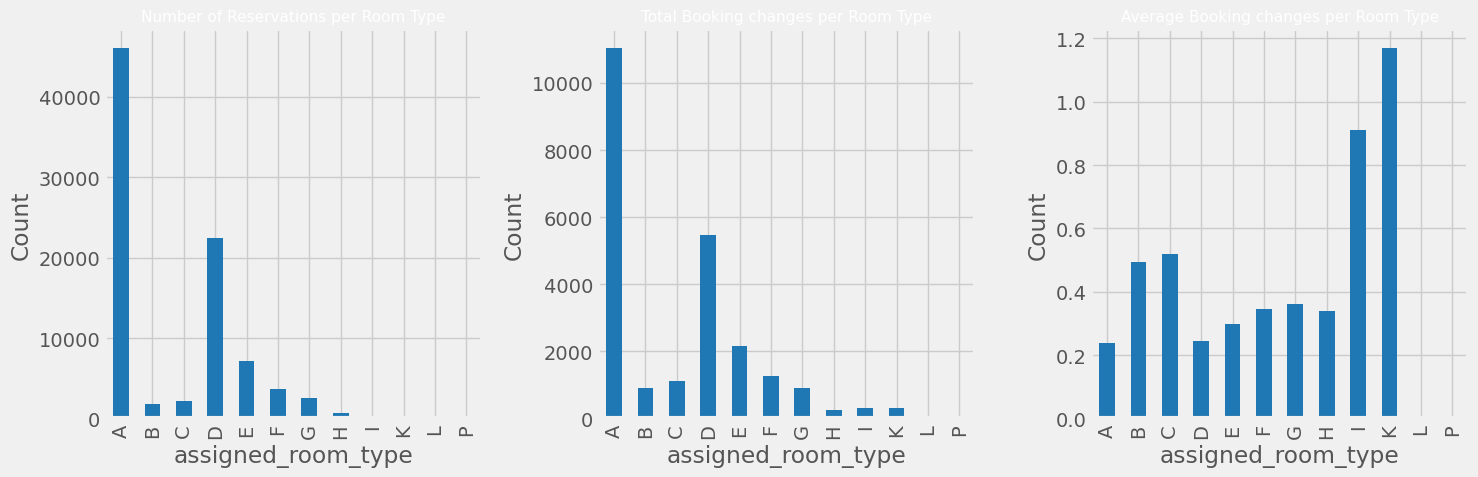

In [47]:
# creating the plotting axes
fig, ax=plt.subplots(ncols=3, figsize=(15,5))

# grouping our data by room_type inorder to get the total number of reservations per toom type
data.groupby('assigned_room_type')['is_canceled'].count().\
            plot.bar(ax=ax[0],color='tab:blue')                         # creating a bar plot for the first axis
ax[0].set_ylabel("Count")                                               #labeling the y axis
ax[0].set_title("Number of Reservations per Room Type", fontsize='11')  # setting the subplot title


# creating a pivot table for the number of booking changes that happened for each room type
pd.pivot_table(data,                                                   # data
               values='booking_changes',                                # values used for aggregation
               index=['assigned_room_type'],                            # column used as index
               aggfunc=[np.sum] )[('sum', 'booking_changes')].\
            plot.bar(ax=ax[1], color="tab:blue")                        # bar plot for middle axis               
ax[1].set_ylabel("Count")                                               # y axis labe
ax[1].set_title("Total Booking changes per Room Type", fontsize='11')   # title


# creating a pivot table for the mean number of booking changes that happened for each room type
pd.pivot_table(data,                                                 # data
               values='booking_changes',                              # values used for aggregation
               index=['assigned_room_type'],                          # column used for grouping
               aggfunc=[np.mean])[('mean', 'booking_changes')].\
            plot.bar(ax=ax[2], color="tab:blue")                              # bar plot for the third axis
ax[2].set_ylabel("Count")                                             # y axis label
ax[2].set_title("Average Booking changes per Room Type", fontsize='11') # title

plt.tight_layout()
plt.show();

From the graphs above:
- The room_type A gote the many reservations and also due to the high number of reservations it got the most booking changes
- Room_type B got the most mean booking changes while it had few bookings therefore that particular room type should be imporved or upgraded because most most are changing their booking on that particular room-type

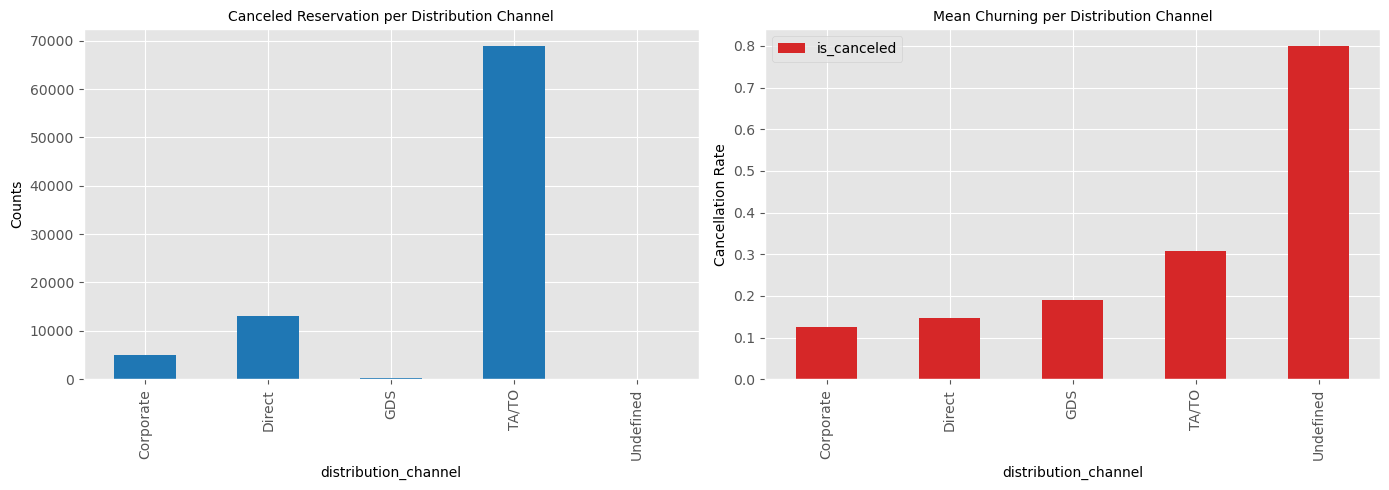

In [ ]:
# creating the plotting axes and figure size
fig, axes=plt.subplots(ncols=2, figsize=(14,5))

# grouping the canceled rows by distribution_channel to get the total number of canceled reservations 
#obtained from each channel
hotel.groupby('distribution_channel')['distribution_channel'].count().\
            plot.bar(ax=axes[0],color='tab:blue')                                           #creating the bar plot
axes[0].set_title("Canceled Reservation per Distribution Channel", fontsize='10')           # axis title
axes[0].set_ylabel("Counts")                                                                # y axis label


# grouping the whole dataframe and by mean aggregate to get the mean number of canceled reservations for each channel
data3= hotel[['is_canceled','distribution_channel']].groupby(['distribution_channel']).mean().\
            plot.bar(ax=axes[1], color='tab:red')                                                 # creating bar plot
axes[1].set_title("Mean Churning per Distribution Channel", fontsize='10')                        # axis title
axes[1].set_ylabel("Cancellation Rate")                                                           # y axis label


plt.tight_layout()
plt.show();

From the graphs above;
- The most of the reservations were obtained from the TA/TO (ie Travel Agencies and Tour Operators) channels
- Due to the fact the TA?TO channel had the most reservations therefore it would also have the most canceled reservations therefore we used mean to determine. The channel with the most mean reservation canceling were the reservations obatined from Undefined channels followed by the Travel Agencies channel.


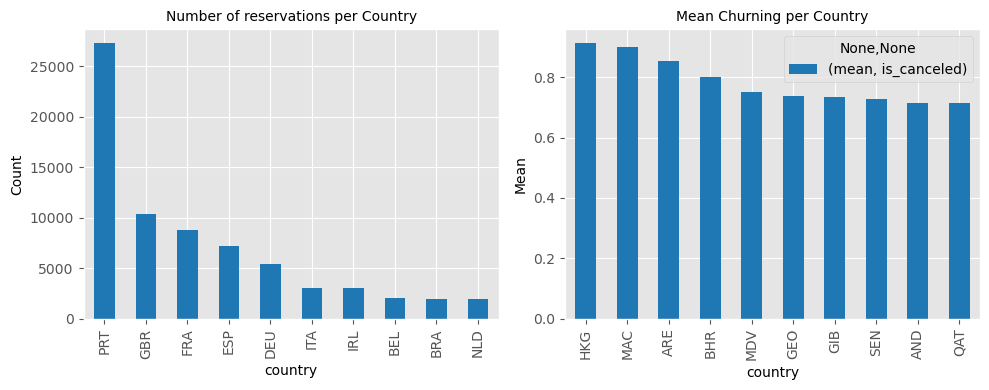

In [ ]:
# creating the plotting axes
fig, axes=plt.subplots(ncols=2, figsize=(10,4))

# grouping our data country and selecting the top 10  countries with the most reservation requests
hotel.groupby('country')['is_canceled'].count().\
            sort_values( ascending=False)[:10].\
            plot.bar(ax=axes[0],color='tab:blue')                                 # plotting barplot
axes[0].set_title("Number of reservations per Country",fontsize='10')             # setting axis title
axes[0].set_ylabel("Count")                                                       # setting y axis label

# pivoting our data country a to get the mean reservation cancelation rate for each country
data=pd.pivot_table(hotel,                                                        # creating pivot table
                    values='is_canceled',                                         # is_canceled column used for aggregation
                    index=['country'],                                            # grouping by country column
                    aggfunc=[np.mean])

# using the pivot output to display the top 10 countries with most reservation cancelations
data[data[('mean', 'is_canceled')]!=1].\
            sort_values(by=('mean', 'is_canceled') ,ascending=False)[:10].\
            plot.bar(ax=axes[1],color='tab:blue')                                  # creating the bar plot
axes[1].set_title("Mean Churning per Country",fontsize='10' )                      # setting axis title
axes[1].set_ylabel("Mean")                                                         # setting y label

plt.tight_layout()
plt.show()

From the graphs above;
- PRT (Portugal) had the most reservations since the hotels are located in Portugal. GBR( United Kingdom of Great Britain and Northern Ireland), FRA(France) and ESP(Spain) were the top 3 most international reservations obtained. Therefore more resources / offers should be directed to those countries to boost their booking rates.
- HKG(Hong Kong), MAC(Macao) and ARE( United Arab Emirates) are the top 3with the most canceled rate. the Management should device startegies , like tayloring those countries specialised rooms or menu, to reduce the cancelation rate from those countries and increase bookings